# Download Data

In [ ]:
# For Google Colab. If not on Colab, make sure kaggle.json is it the right location
from google.colab import files

# upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# move kaggle.json to the right location
!pip install -q kaggle
!ls
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

kaggle.json  sample_data


In [ ]:
# download our dataset using the Kaggle api
!kaggle competitions download home-credit-default-risk -p "home-credit-default-risk"

 85% 65.0M/76.3M [00:00<00:00, 106MB/s] 
100% 76.3M/76.3M [00:00<00:00, 119MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 73.5MB/s]
 95% 35.0M/36.8M [00:00<00:00, 68.1MB/s]
100% 36.8M/36.8M [00:00<00:00, 82.9MB/s]
 89% 97.0M/109M [00:01<00:00, 75.1MB/s]
100% 109M/109M [00:01<00:00, 89.1MB/s] 
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 55.2MB/s]
 86% 5.00M/5.81M [00:00<00:00, 41.0MB/s]
100% 5.81M/5.81M [00:00<00:00, 36.8MB/s]
 86% 49.0M/56.8M [00:00<00:00, 61.8MB/s]
100% 56.8M/56.8M [00:00<00:00, 83.2MB/s]
 91% 33.0M/36.1M [00:00<00:00, 72.4MB/s]
100% 36.1M/36.1M [00:00<00:00, 81.0MB/s]
 96% 261M/271M [00:02<00:00, 120MB/s]
100% 271M/271M [00:02<00:00, 126MB/s]
 99% 96.0M/96.7M [00:00<00:00, 119MB/s]
100% 96.7M/96.7M [00:00<00:00, 132MB/s]


In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd

zip_ref = zipfile.ZipFile('home-credit-default-risk/application_train.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/application_test.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/credit_card_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/installments_payments.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/POS_CASH_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/previous_application.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()

# Load Datasets From Files

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
DATA_DIR = "datasets" # folder where unzipped files are

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
# datasets that we have
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

# Load In Datasets

## Previous Applications

In [ ]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": "mean",
    "CNT_PAYMENT": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
})

In [ ]:
PCB_df_copy = datasets['POS_CASH_balance'].groupby('SK_ID_PREV').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
POS_to_PA_df =  datasets['previous_application'].merge(PCB_df_copy, how='left', on='SK_ID_PREV')
PCB_df_temp = POS_to_PA_df.groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})
PCB_df_temp=PCB_df_temp.rename({"CNT_INSTALMENT":"PREV_CNT_INSTALMENT","CNT_INSTALMENT_FUTURE":"PREV_CNT_INSTALMENT_FUTURE","MONTHS_BALANCE":"PREV_PCB_MONTHS_BALANCE" }, axis='columns')
PA_df = pd.concat([PA_df, PCB_df_temp], axis=1)

In [ ]:
IP_df_copy = datasets['installments_payments'].groupby('SK_ID_PREV').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df_copy["SUM_MISSED"] = IP_df_copy["AMT_INSTALMENT"] - IP_df_copy["AMT_PAYMENT"]
IP_to_PA_df =  datasets['previous_application'].merge(IP_df_copy, how='left', on='SK_ID_PREV')
IP_df_temp = IP_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min"
})
IP_df_temp = IP_df_temp.rename({"AMT_INSTALMENT":"PREV_AMT_INSTALMENT", "AMT_PAYMENT":"PREV_AMT_PAYMENT", "DAYS_INSTALMENT":"PREV_DAYS_INSTALMENT",  "DAYS_ENTRY_PAYMENT": "PREV_DAYS_ENTRY_PAYMENT"}, axis = 'columns')
PA_df = pd.concat([PA_df, IP_df_temp], axis=1)

In [ ]:
CCB_df_copy = datasets['credit_card_balance'].groupby('SK_ID_PREV').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})
CCB_to_PA_df =  datasets['previous_application'].merge(CCB_df_copy, how='left', on='SK_ID_PREV')
CCB_df_temp = CCB_to_PA_df.groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count"
})
CCB_df_temp = CCB_df_temp.rename({"AMT_BALANCE":"PREV_AMT_BALANCE", "MONTHS_BALANCE": "PREV_CCB_MONTHS_BALANCE","AMT_CREDIT_LIMIT_ACTUAL":"PREV_AMT_CREDIT_LIMIT_ACTUAL"}, axis ='columns')
PA_df = pd.concat([PA_df, CCB_df_temp], axis=1)

## POS Cash Balances

In [ ]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": "count",
    "CNT_INSTALMENT_FUTURE": "mean",
    "MONTHS_BALANCE": "min",
})

## Instalment Payments

In [ ]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "AMT_INSTALMENT": "sum",
    "AMT_PAYMENT": "sum",
    "DAYS_INSTALMENT": "min",
    "DAYS_ENTRY_PAYMENT": "min",
})
IP_df["SUM_MISSED"] = IP_df["AMT_INSTALMENT"] - IP_df["AMT_PAYMENT"]

## Bureau

In [ ]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE": "min",
    "CREDIT_ACTIVE": "max",
    "DAYS_CREDIT": "mean",
    "AMT_CREDIT_SUM": "max",
})

In [ ]:
BB_df = datasets['bureau_balance'].groupby('SK_ID_BUREAU').agg({
    "MONTHS_BALANCE": "min",
    "STATUS": ["max", "min", "count"] 
})
temp = pd.DataFrame({"MONTHS_BALANCE_MIN": BB_df["MONTHS_BALANCE"]["min"],  "STATUS_MAX": BB_df["STATUS"]["max"], "STATUS_MIN":BB_df["STATUS"]["min"], "STATUS_COUNT": BB_df["STATUS"]["count"]})
BB_df = temp
BB_to_B_df =  datasets['bureau'].merge(BB_df, how='left', on='SK_ID_BUREAU')
BB_to_B_df = BB_to_B_df.dropna(subset = ["STATUS_MAX","STATUS_MIN"])
B_df_temp = BB_to_B_df.groupby('SK_ID_CURR').agg({
    "MONTHS_BALANCE_MIN": "min",
    "STATUS_MIN": "min",
    "STATUS_MAX" : 'max',
    "STATUS_COUNT": "count"
})
B_df = pd.concat([B_df, B_df_temp], axis=1)

In [ ]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE": "mean",
    "MONTHS_BALANCE": "min",
    "AMT_CREDIT_LIMIT_ACTUAL": "count",
})

In [ ]:
# initialize results table
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])

# Deep Learning Model

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
from time import time

app = datasets["application_train"]
train_x = app.loc[:, app.columns != "TARGET"]
train_y = app["TARGET"]
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score

# preprocess data
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# globals
batch_size = 64
num_epochs = 100
num_in = train_x.shape[1]
num_layer_1 = 20
num_output = 2

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [ ]:
from time import time

losses = []
test_losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

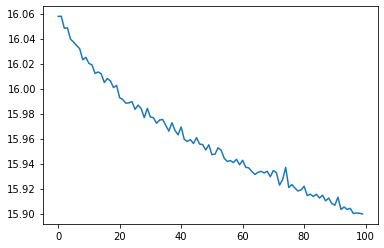

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), losses, label="train loss")

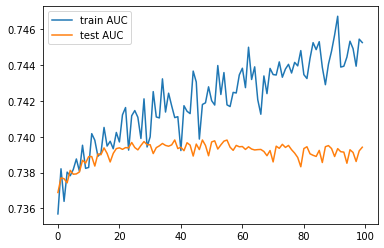

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

In [ ]:
results.loc[0] = ["Deep Learning", roc, "--", "--", 
                   train_time, test_time, "Deep Learning w/ Application Data"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data


# Adding All Features

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
batch_size = 64
num_epochs = 100
num_in = train_x.shape[1]
num_layer_1 = 20
num_output = 2

In [ ]:
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.BCELoss()

In [ ]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

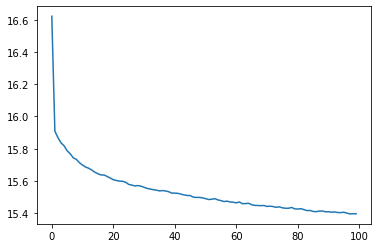

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

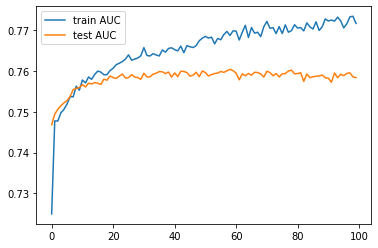

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

In [ ]:
results.loc[1] = ["Deep Learning", roc, "--", "--", 
                   train_time, test_time, "Deep Learning w/ all other data"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data
1,Deep Learning,0.758407,--,--,1400.716561,0.048049,Deep Learning w/ all other data


# Adam Optimizer

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
# globals
# note: realistically we can only get 20 epochs before overfitting
batch_size = 64
num_epochs = 20
num_layer_1 = 20
num_in = train_x.shape[1]
num_output = 2

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, num_layer_1),
        nn.ReLU(),
        nn.Linear(num_layer_1, num_output),
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.999))
loss_fn = nn.BCELoss()

In [ ]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

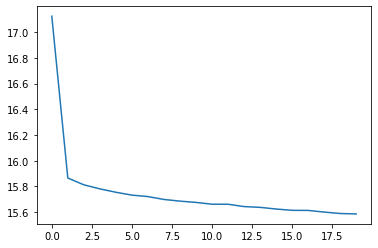

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

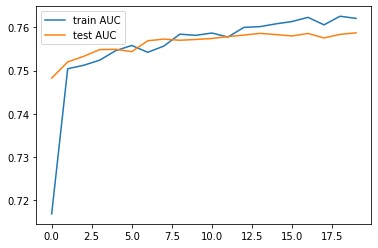

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
from sklearn.metrics import roc_auc_score

start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [ ]:
results.loc[2] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "Adam optimizer"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data
1,Deep Learning,0.758407,--,--,1400.716561,0.048049,Deep Learning w/ all other data
2,Deep Learning,0.758704,--,0.917315,238.759920,0.047533,Adam optimizer
3,Deep Learning,0.671086,--,0.906519,995.408674,0.873410,More layers
4,Deep Learning,0.732227,--,0.918854,510.319242,1.011763,K-Fold training
5,Deep Learning,0.750459,--,0.917424,264.229233,0.056706,Modifying Layer Sizes


## Kaggle Submission

In [ ]:
test = datasets['application_test']
test = test.merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')

test["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = test['REGION_POPULATION_RELATIVE'] * test['DAYS_ID_PUBLISH']
test["AMT_CREDIT/AMT_GOODS_PRICE"] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] / test['OBS_30_CNT_SOCIAL_CIRCLE']
test["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = test['DAYS_BIRTH'] + test['DAYS_LAST_PHONE_CHANGE']
test["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] + test['DEF_60_CNT_SOCIAL_CIRCLE']
test["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = test['AMT_GOODS_PRICE'] + test['DAYS_EMPLOYED']
test["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = test['REGION_POPULATION_RELATIVE'] * test['AMT_GOODS_PRICE']

test["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["CNT_PAYMENT"]
test["DAYS_BIRTH+MONTHS_BALANCE"] = test["DAYS_BIRTH"] + test["MONTHS_BALANCE_x"]
test["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["DAYS_ENTRY_PAYMENT"]
test["DAYS_BIRTH*DAYS_CREDIT"] = test["DAYS_BIRTH"] * test["DAYS_CREDIT"]

In [ ]:
# convert test to tensor
test_numpy = scaler.transform(test)
test_tensor = torch.from_numpy(test_numpy).float()

preds = model(test_tensor)[:, 0].detach().numpy()
submit_df = test[['SK_ID_CURR']]
submit_df['TARGET'] = preds

submit_df.to_csv("submission.csv",index=False)

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.040534
1,100005,0.196219
2,100013,0.023798
3,100028,0.053782
4,100038,0.170401


In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "NN submission"

100% 878k/878k [00:00<00:00, 4.15MB/s]
Successfully submitted to Home Credit Default Risk

# More Layers

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, stratify=train_y, random_state=30)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# globals
# note: realistically we can only get 20 epochs before overfitting
batch_size = 64
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.1),
        nn.Linear(32, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

In [ ]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

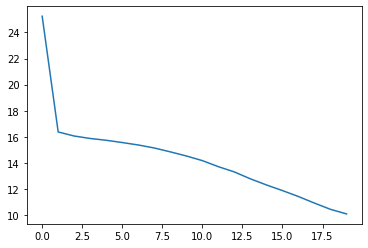

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

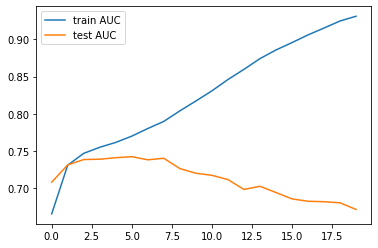

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [ ]:
results.loc[3] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "More layers"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data
1,Deep Learning,0.758407,--,--,1400.716561,0.048049,Deep Learning w/ all other data
2,Deep Learning,0.758383,--,0.917359,254.027061,0.046805,Adam optimizer
3,Deep Learning,0.671086,--,0.906519,995.408674,0.873410,More layers


# K-Fold Training

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, stratify=train_y, random_state=30)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# globals
batch_size = 128
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

kfold = KFold(n_splits=5, shuffle=True)
indexes_gen = kfold.split(train_x_tensor)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(128),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.2),
        nn.Linear(32, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

In [ ]:
data_loaders = []
test_idxs = []
for train_idx, test_idx in kfold.split(train_x_tensor):
  dataset = torch.utils.data.TensorDataset(train_x_tensor[train_idx], train_y_tensor[train_idx])
  data_loaders.append(torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True))
  test_idxs.append(test_idx)

In [ ]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs
curr_fold = 0

start = time()
for epoch in range(epochs):
  # get fold
  if curr_fold+1 >= len(data_loaders):
    curr_fold = 0
  data_loader = data_loaders[curr_fold]
  test_idx = test_idxs[curr_fold]

  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

  # get test-train scores
  preds = model(train_x_tensor[test_idx])[:, 0].detach()
  loss = loss_fn(preds, train_y_tensor[test_idx]).detach()
  try:
    auc = roc_auc_score(train_y_tensor[test_idx], preds.detach().numpy())
  except:
    auc = 0

  losses.append(loss)
  roc_scores.append(auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
  curr_fold += 1
train_time = time() - start

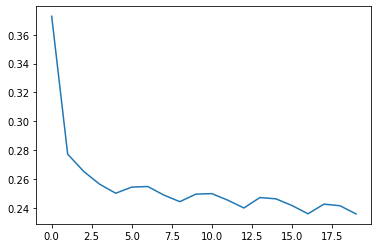

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

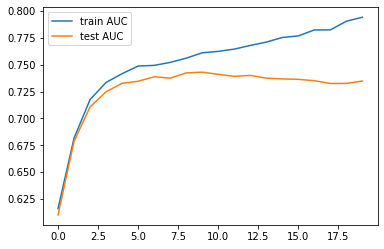

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [ ]:
results.loc[4] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "K-Fold training"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data
1,Deep Learning,0.758407,--,--,1400.716561,0.048049,Deep Learning w/ all other data
2,Deep Learning,0.758383,--,0.917359,254.027061,0.046805,Adam optimizer
3,Deep Learning,0.671086,--,0.906519,995.408674,0.873410,More layers
4,Deep Learning,0.732227,--,0.918854,510.319242,1.011763,K-Fold training


# Other Layer Sizes

In [ ]:
train = datasets['application_train']
train = train.merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')

train["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = train['REGION_POPULATION_RELATIVE'] * train['DAYS_ID_PUBLISH']
train["AMT_CREDIT/AMT_GOODS_PRICE"] = train['AMT_CREDIT'] / train['AMT_GOODS_PRICE']
train["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] / train['OBS_30_CNT_SOCIAL_CIRCLE']
train["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = train['DAYS_BIRTH'] + train['DAYS_LAST_PHONE_CHANGE']
train["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = train['DEF_30_CNT_SOCIAL_CIRCLE'] + train['DEF_60_CNT_SOCIAL_CIRCLE']
train["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = train['AMT_GOODS_PRICE'] + train['DAYS_EMPLOYED']
train["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = train['REGION_POPULATION_RELATIVE'] * train['AMT_GOODS_PRICE']

train["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["CNT_PAYMENT"]
train["DAYS_BIRTH+MONTHS_BALANCE"] = train["DAYS_BIRTH"] + train["MONTHS_BALANCE_x"]
train["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = train["DAYS_LAST_PHONE_CHANGE"] + train["DAYS_ENTRY_PAYMENT"]
train["DAYS_BIRTH*DAYS_CREDIT"] = train["DAYS_BIRTH"] * train["DAYS_CREDIT"]

In [ ]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE", "FLAG_DOCUMENT_4",
  "REG_CITY_NOT_WORK_CITY", "REG_CITY_NOT_LIVE_CITY",

  "NAME_SELLER_INDUSTRY", "NAME_PORTFOLIO", "CREDIT_TYPE", "CREDIT_ACTIVE",

  "STATUS_MIN", "STATUS_MAX"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
  "DAYS_EMPLOYED", "FLOORSMIN_AVG", "TOTALAREA_MODE", "APARTMENTS_AVG",
  "LIVINGAPARTMENTS_AVG", "DAYS_REGISTRATION", "OWN_CAR_AGE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",

  "REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH", "AMT_CREDIT/AMT_GOODS_PRICE",
  "DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE",
  "DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE",
  "DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE",
  "AMT_GOODS_PRICE+DAYS_EMPLOYED", "REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE",

  "CNT_INSTALMENT", "MONTHS_BALANCE_x", "DAYS_ENTRY_PAYMENT", "DAYS_INSTALMENT",
  "DAYS_CREDIT", "AMT_BALANCE", "MONTHS_BALANCE_y", "AMT_CREDIT_LIMIT_ACTUAL",

  "DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT", "DAYS_BIRTH+MONTHS_BALANCE",
  "DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT", "DAYS_BIRTH*DAYS_CREDIT",

  "PREV_CNT_INSTALMENT","PREV_CNT_INSTALMENT_FUTURE",
  "PREV_PCB_MONTHS_BALANCE","PREV_AMT_INSTALMENT","PREV_AMT_PAYMENT",
  "PREV_DAYS_INSTALMENT","PREV_DAYS_ENTRY_PAYMENT","PREV_AMT_BALANCE",
  "PREV_CCB_MONTHS_BALANCE","PREV_AMT_CREDIT_LIMIT_ACTUAL",
  "MONTHS_BALANCE_MIN","STATUS_COUNT"
]

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
# to tensors
train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
# globals
batch_size = 64
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 20),
        nn.ReLU(),
        nn.Linear(20, 20),
        nn.ReLU(),
        nn.Linear(20, num_output),
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001, betas=(0.9, 0.9))
loss_fn = nn.BCELoss()

In [ ]:
from time import time

losses = []
roc_scores = []
test_roc_scores = []
epochs = num_epochs

start = time()
for epoch in range(epochs):
  running_loss = 0.0
  running_auc = 0.0
  num_train_auc = 0
  for batch, data in enumerate(data_loader):
    input, labels = data[0], data[1]

    opt.zero_grad()
    pred = model(input)[:, 0]
    loss = loss_fn(pred, labels)
    loss.backward()
    opt.step()

    running_loss += loss.detach()
    try:
      running_auc += roc_auc_score(labels, pred.detach().numpy())
      num_train_auc += 1
    except: pass

  losses.append(running_loss/batch_size)
  roc_scores.append(running_auc/num_train_auc)
  preds = model(test_x_tensor)[:,0].detach().numpy()
  test_roc_scores.append(roc_auc_score(test_y, preds))
train_time = time() - start

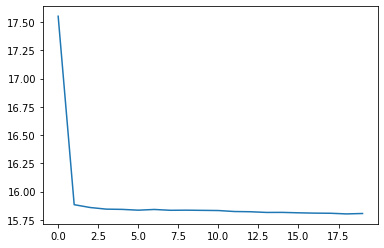

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), losses)

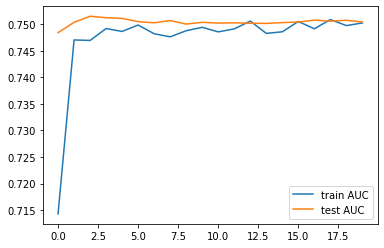

In [ ]:
plt.plot(range(epochs), roc_scores, label="train AUC")
plt.plot(range(epochs), test_roc_scores, label="test AUC")
plt.legend()

In [ ]:
start = time()
preds = model(test_x_tensor)[:,0].detach().numpy()
roc = roc_auc_score(test_y, preds)
test_time = time() - start

acc = np.sum(np.round(preds) == test_y) / len(test_y)

In [ ]:
results.loc[5] = ["Deep Learning", roc, "--", acc, 
                   train_time, test_time, "Modifying Layer Sizes"]

results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Deep Learning,0.739418,--,--,1075.331878,0.037791,Deep Learning w/ Application Data
1,Deep Learning,0.758407,--,--,1400.716561,0.048049,Deep Learning w/ all other data
2,Deep Learning,0.758383,--,0.917359,254.027061,0.046805,Adam optimizer
3,Deep Learning,0.671086,--,0.906519,995.408674,0.873410,More layers
4,Deep Learning,0.732227,--,0.918854,510.319242,1.011763,K-Fold training
5,Deep Learning,0.750459,--,0.917424,264.229233,0.056706,Modifying Layer Sizes


## Kaggle Submission

In [ ]:
test = datasets['application_test']
test = test.merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')

test["REGION_POPULATION_RELATIVE*DAYS_ID_PUBLISH"] = test['REGION_POPULATION_RELATIVE'] * test['DAYS_ID_PUBLISH']
test["AMT_CREDIT/AMT_GOODS_PRICE"] = test['AMT_CREDIT'] / test['AMT_GOODS_PRICE']
test["DEF_30_CNT_SOCIAL_CIRCLE/OBS_30_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] / test['OBS_30_CNT_SOCIAL_CIRCLE']
test["DAYS_BIRTH+DAYS_LAST_PHONE_CHANGE"] = test['DAYS_BIRTH'] + test['DAYS_LAST_PHONE_CHANGE']
test["DEF_30_CNT_SOCIAL_CIRCLE+DEF_60_CNT_SOCIAL_CIRCLE"] = test['DEF_30_CNT_SOCIAL_CIRCLE'] + test['DEF_60_CNT_SOCIAL_CIRCLE']
test["AMT_GOODS_PRICE+DAYS_EMPLOYED"] = test['AMT_GOODS_PRICE'] + test['DAYS_EMPLOYED']
test["REGION_POPULATION_RELATIVE*AMT_GOODS_PRICE"] = test['REGION_POPULATION_RELATIVE'] * test['AMT_GOODS_PRICE']

test["DAYS_LAST_PHONE_CHANGE+CNT_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["CNT_PAYMENT"]
test["DAYS_BIRTH+MONTHS_BALANCE"] = test["DAYS_BIRTH"] + test["MONTHS_BALANCE_x"]
test["DAYS_LAST_PHONE_CHANGE+DAYS_ENTRY_PAYMENT"] = test["DAYS_LAST_PHONE_CHANGE"] + test["DAYS_ENTRY_PAYMENT"]
test["DAYS_BIRTH*DAYS_CREDIT"] = test["DAYS_BIRTH"] * test["DAYS_CREDIT"]

In [ ]:
# convert test to tensor
test_numpy = scaler.transform(test)
test_tensor = torch.from_numpy(test_numpy).float()

preds = model(test_tensor)[:, 0].detach().numpy()
submit_df = test[['SK_ID_CURR']]
submit_df['TARGET'] = preds

submit_df.to_csv("submission.csv",index=False)

submit_df.head()

,SK_ID_CURR,TARGET
0,100001,0.060307
1,100005,0.231580
2,100013,0.022034
3,100028,0.028798
4,100038,0.170697


In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "NN submission"

100% 877k/877k [00:00<00:00, 3.37MB/s]
Successfully submitted to Home Credit Default Risk

# Other Stuff

In [ ]:
#Sequential API

In [ ]:

import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from sklearn.model_selection import train_test_split
train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15, random_state=30)




In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='constant')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])


scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)


In [ ]:

train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()

In [ ]:
batch_size = 128
num_epochs = 20
num_in = train_x.shape[1]
num_output = 2

In [ ]:
class CustomModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Linear(num_in, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(256),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.BatchNorm1d(512),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.BatchNorm1d(128),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.BatchNorm1d(64),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.2),
        nn.Linear(32, num_output)
    )

  def forward(self, x):
    out = self.linear(x)
    return nn.functional.softmax(out)

model = CustomModel()
opt = optim.Adam(model.parameters(), lr=0.0001)
loss_fn = nn.BCELoss()

In [ ]:
# create data loaders
train_set = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
data_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

In [ ]:
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_size=0.15

losses = []
# is there a GPU availabale. If available use it
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

train_x = train.loc[:, train.columns != "TARGET"]
train_y = train['TARGET']
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.15,random_state=30)
## Scaling

scaler = preprocess_pipeline.fit(train_x, train_y)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x) #Transform test set with the same constants

# convert numpy arrays to tensors

train_x_tensor = torch.from_numpy(train_x).float()
test_x_tensor = torch.from_numpy(test_x).float()
train_y_tensor = torch.from_numpy(np.array(train_y)).float()
test_y_tensor = torch.from_numpy(np.array(test_y)).float()



# create TensorDataset in PyTorch
boston_train = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)
boston_validation = torch.utils.data.TensorDataset(test_x_tensor, test_y_tensor)
boston_test = torch.utils.data.TensorDataset(test_x_tensor, test_y_tensor)
# create dataloader
batch_size = 128
trainloader_boston = torch.utils.data.DataLoader(boston_train, batch_size=batch_size, shuffle=True, num_workers=2)
validloader_boston = torch.utils.data.DataLoader(boston_validation, batch_size=test_x.shape[0], shuffle=False, num_workers=2)
testloader_boston = torch.utils.data.DataLoader(boston_test, batch_size=test_x.shape[0], shuffle=False, num_workers=2)

D_in = test_x.shape[1]
print(D_in)
D_hidden =20
D_out = 2

#optimizer = optim.SGD(model.parameters(), lr=0.0001)

epochs = range(5)
count = 0 
running_loss = 0.0
for epoch in epochs:
    running_loss = 0.0
    for batch, data in enumerate(data_loader):
        input, labels = data[0], data[1]
        
        running_loss = 0.0
        running_auc = 0.0
        num_train_auc = 0
        opt.zero_grad()
        pred = model(input)[:, 0]
        loss = loss_fn(pred, labels)
        loss.backward()
        opt.step()
        

        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients

        # perform gradient update
        #running_loss += loss.item()*input.size(0)
        count += input.size(0)
        running_loss += loss.detach()
        losses.append(running_loss/batch_size)
    print("Epoch {} batch {} BCE Loss is {}".format(epoch,batch,(running_loss/batch_size)))
        # print statistics
    #print(f"Epoch {epoch+1}, mini batch loss {batch+1}, MSE loss: {np.round(running_loss/count, 3)}")
#print(losses)
print("finished training")


count = 0 
running_loss = 0.0
for batch, data in enumerate(testloader_boston):
    input, labels = data[0], data[1]
    # do forward pass
    output = model(input.float())

    # compute loss and gradients
    loss = loss_fn(output, torch.unsqueeze(labels.float(), dim=1))
    # print statistics
    running_loss += loss.item()*input.size(0)
    count += input.size(0) 
    test_size +=batch_size
print(f" TEST  BCE loss: {np.round(running_loss/count, 3)}")

# predict test
output = model(test_x_tensor.float())
# calculate loss via torch
loss = loss_fn(output, torch.unsqueeze(test_y_tensor.float(), dim=1)).detach().numpy()/test_size
#print(loss)

cpu
173
Epoch 0 batch 2722 BCE Loss is 0.0008841883391141891
Epoch 1 batch 2722 BCE Loss is 0.00023666309425607324
Epoch 2 batch 2722 BCE Loss is 0.0010994228068739176
Epoch 3 batch 2722 BCE Loss is 0.0012235455214977264
Epoch 4 batch 2722 BCE Loss is 0.000625741551630199
finished training
 TEST  BCE loss: 0.103
